# Problem statement


#### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.


#### once they fill up the form they classified as lead.Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.Now, although X Education gets a lot of leads, its lead conversion rate is very poor.so X Education want to select the most promising leads, i.e. the leads that are most likely to convert into paying customers.


#### Here the main goal is :
   - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance    

In [258]:
## Import libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

#### Data Reading and Data understanding

In [259]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- data contains 9240 rows and 37 columns
- here converted is our target variable
- data contains select values in some columns which are missing values

## Data preparation and Data handling

In [261]:
# checking for missing value percentage
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000


- from the above there are so many missing values in data 
- Replacing NAN values and trying to get the percentage
- then drop the columns having more than 40% of missing values
- Missing values(less than 2%) Dropping the rows and for other missing values use imputation technique

In [262]:
# replacing select values with NaN
df=df.replace('Select',np.nan)

In [263]:
# again check the null valu peecentage
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [264]:
# droping the columns having missing values 40% 
for i in df.columns:
    if df[i].isnull().mean()> 0.40:
     
        df.drop(i,axis=1,inplace=True)
        
        

In [265]:
# lets check the data
df.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

#### Getting average of NAN values present in the Dataset

In [266]:
# use iputation techninque for other columns, for this create a list of columns having morethan 2% missing values
missing_list=['Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City']


- from the above those columns are object type so simply replace missing values with mode


#### Filling Nan values

In [267]:

for i in missing_list:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [268]:
# check the data for missing values 
df.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [269]:
# Now drop the rows having missing values less than 2%
df.dropna(inplace=True)
df.isnull().mean()

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

- now there are no missing values in the data


In [270]:
#lets look the data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


-the above data contains some boolean columns so encode them . means replace yes with 1 and No with zero 

In [271]:
df=df.replace('Yes',1)
df=df.replace('No',0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   int64  
 5   Do Not Call                                    9074 non-null   int64  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

__check the imbalance in the data__
#### Data imbalance usually reflects an unequal distribution of classes within a dataset.Here we need to check data imabalance in dependent variable.Here dependent variable is Converted  

In [272]:
df['Converted'].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

In [273]:
#convertion rate
print("Conversion rate is ", (sum(df['Converted'])/len(df['Converted'].index))*100)

Conversion rate is  37.85541106458012


- from the above we can say that data is not that much of  imbalanced so we can consider it

In [274]:
#lets check the statistical summary
df.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,23348.029512,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596406.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615278.500000,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637176.500000,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


- from the above we can tell that some numeric columns have outliers

# Exploratory data analysis

## Check for outliers using univariate analysis 
The purpose of univariate analysis is to understand the distribution of values for a single variable.Here boxplot can be used 
for handling outliers.
outliers present in numerical features only,so we take all the columns which are float64 type and some int64 which may contains outliers

In [275]:
df_nume=[i for i in df if df[i].dtype!='O']
print(len(df_nume))

19


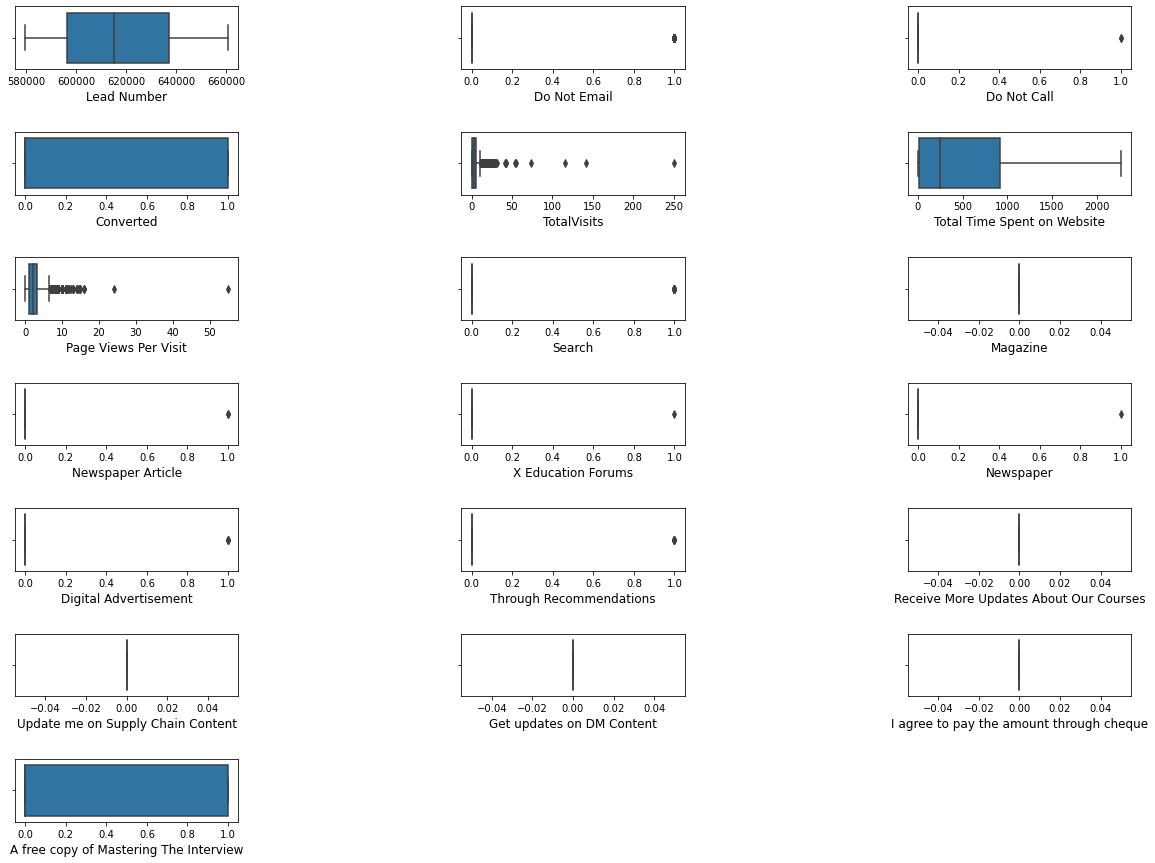

In [276]:
#Box plot for numerical variables
i=1
plt.figure(figsize=(20,15))
for col in df_nume: 
    plt.subplot(7,3,i)
    sns.boxplot(df[col])
    plt.xlabel(col,size=12)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=1) 
plt.show()

- from the above outliers present in page views per visit and Total visits.So here we need to cap them to 95 percentile

In [277]:
#create a outlier_list and cap them with 95 percentile
outlier_list=['TotalVisits','Page Views Per Visit']

In [278]:
for i in outlier_list:
    q=df[i].quantile(0.95)
    df[i][df[i] >= q] = q

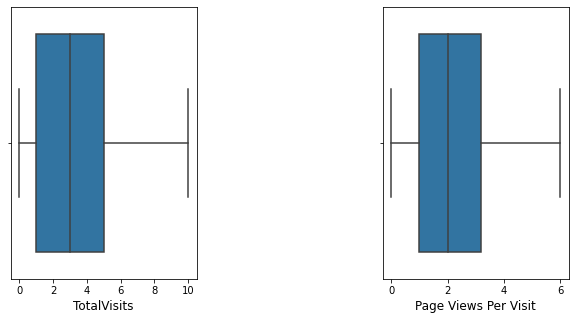

In [279]:
#check for outlier
i=1
plt.figure(figsize=(10,5))
for col in outlier_list: 
    plt.subplot(1,2,i)
    sns.boxplot(df[col])
    plt.xlabel(col,size=12)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=1) 
plt.show()

- Now there no outliers in the data


### Bivariate analysis
Bivariate analysis gives the relation ship between two variables.Here we will do analysis between the other variables with 
dependent variable.

In [280]:
# create the list categorical variables 
df_cat=[i for i in df if df[i].dtype=='O']
df_cat

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'Last Notable Activity']

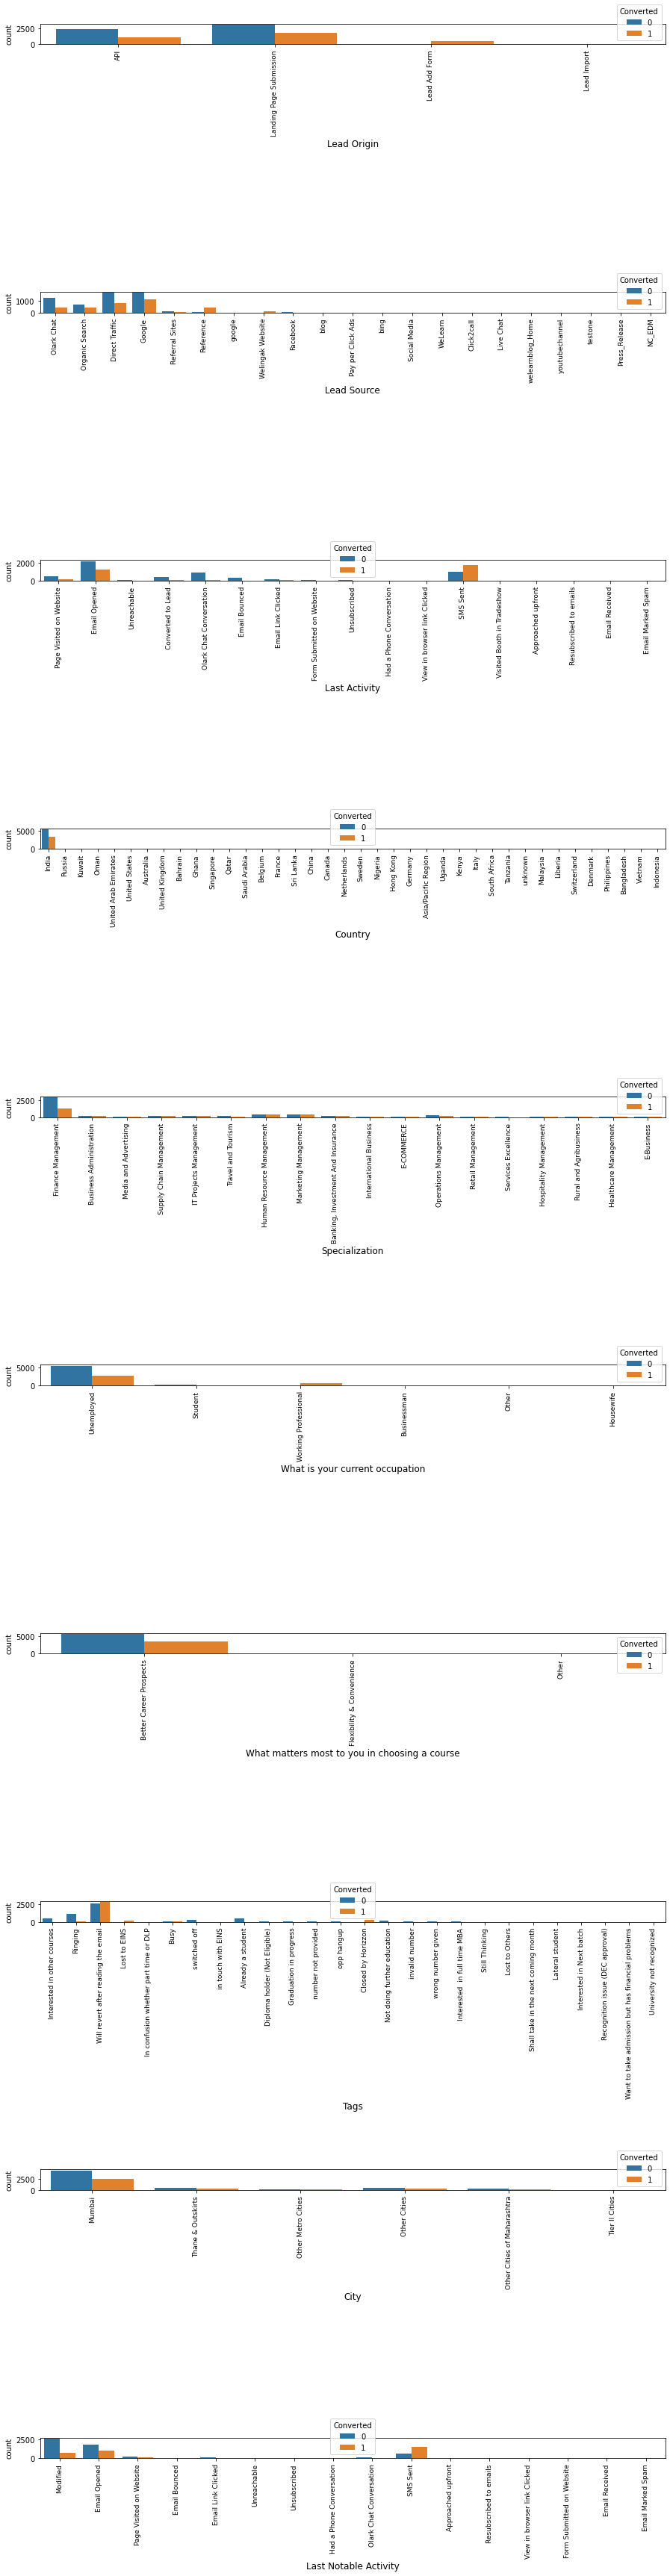

In [281]:
# Here we using countplot
i=1
plt.figure(figsize=(15,60))
for col in df_cat:
    if col !='Prospect ID':
        plt.subplot(10,1,i)
        sns.countplot(x=df[col], hue='Converted' , data= df)
        plt.xlabel(col,size=12)
        plt.xticks(rotation=90,size=9)
        i=i+1
    
plt.subplots_adjust(hspace=12,wspace=1) 
plt.show()

___from the results we can tell that___ 
- in lead origin API and Landing Page Submission have low convertions and lead and form has large no.of conversions
- in lead Source Referral Sites and references have large no.of convertions
- in lead activity view in browser link clicked has large no.of  conversions
- in country only india showing less no.of convertions
- in specialization Finance Management showing low convertions
- in occupation Working Professional showing high convertions
- in choosing  course Better career Prospects showing low convertions 
- in city mumbai showing low convertions
- last notable activity Sms sent showing large no.of convertions
above convertion rate = probability of lead converting(converted=1) *100
-above some columns only some categories showing change in rate so change remaining all into one name as others so that we can get a better model and some in some columns only one category showing change in rate but that is also low convertion rate but here we need to focus on high convertion rate so drop them 


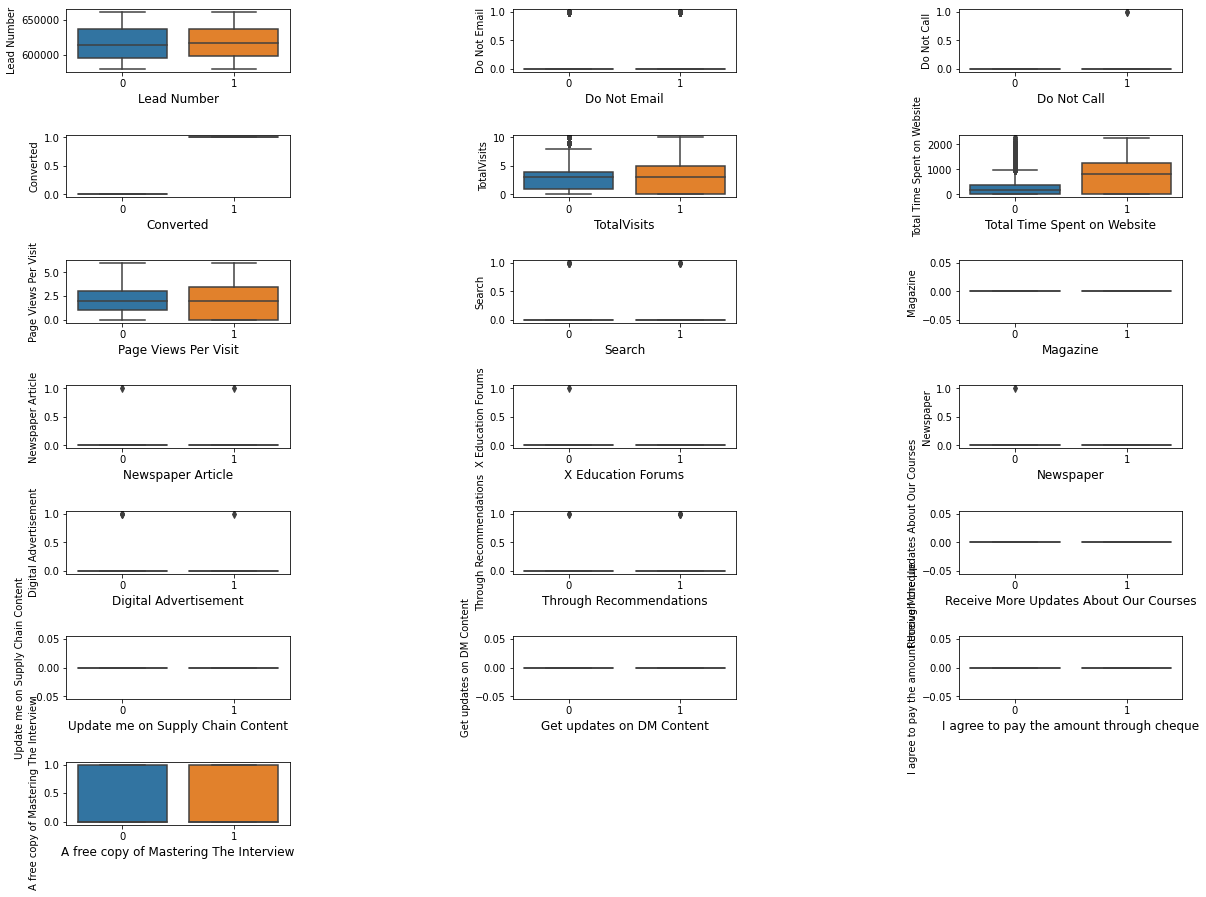

In [282]:
# do the bivariate for numeric columns
i=1
plt.figure(figsize=(20,15))
for col in df_nume: 
    plt.subplot(7,3,i)
    sns.boxplot(y=df[col],x='Converted', data=df)
    plt.xlabel(col,size=12)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=1) 
plt.show()

- from the above Total visits,Total time spent on website and page viwers per vist have high conevrtion rate
- from the above some columns having mean is zero means we cannot made infrences so drop them 
- some columns showing equal convertions and zero convertions and some having only one value  from which we cannot made infrences so drop them because here we need to focus on those who converted


In [283]:
#check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   int64  
 5   Do Not Call                                    9074 non-null   int64  
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

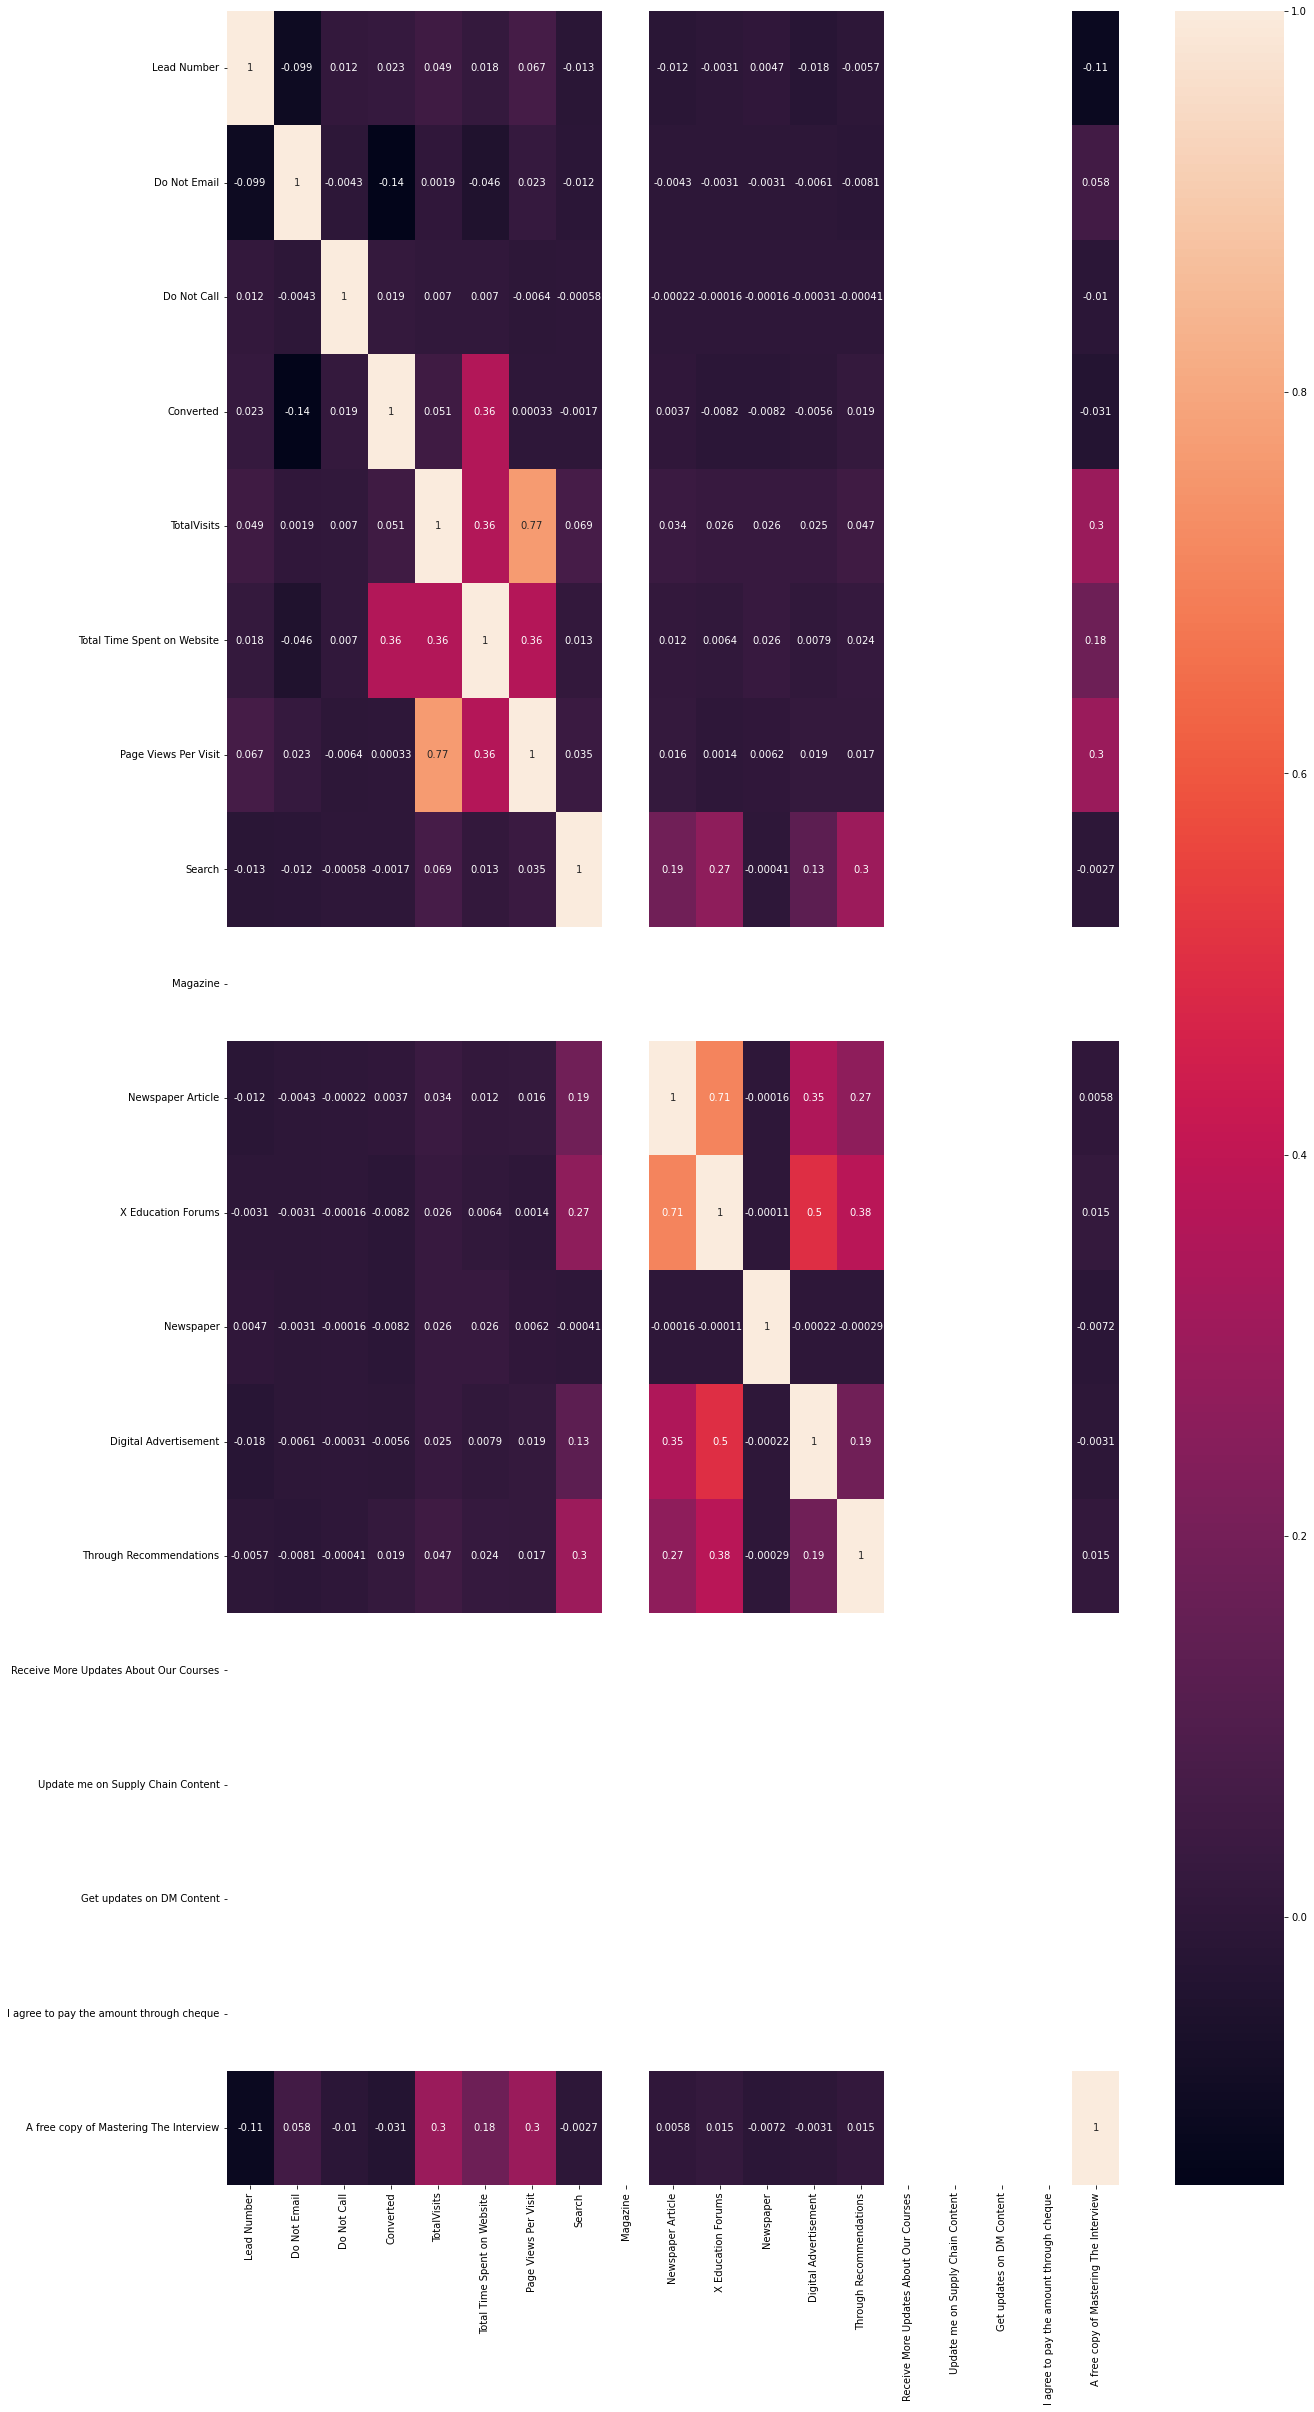

In [284]:
#check for the correlation between the variables

plt.figure(figsize= (20,40))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [285]:
- from the heat map we can see that there are some variabels are highly correlated so drop them

SyntaxError: invalid syntax (2053614389.py, line 1)

In [ ]:
#drop the unwanted data before generating model
df=df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
            'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','Country','Do Not Email','Do Not Call','A free copy of Mastering The Interview'],1)

In [ ]:
#check the data again
df.head()

### Logistic Regression model development
Here we develop the multiple logistic regression model beacuse target varible has a relationship with multiple independent features.Here we know the target variable so it is a supervised ml model

#### Data preparation
here we create dummy variable for categorical variables


___before creating dummies lets do bivariate analysis for remaing categorical columns___

In [ ]:
# Here we using countplot
df_cat_new=[i for i in df if df[i].dtype=='O']
df_cat_new

In [ ]:
i=1
plt.figure(figsize=(15,40))
for col in df_cat_new:
    if col !='Prospect ID':
        plt.subplot(10,1,i)
        sns.countplot(x=df[col], hue='Converted' , data= df)
        plt.xlabel(col,size=12)
        plt.xticks(rotation=45,size=12)
        i=i+1
    
plt.subplots_adjust(hspace=3,wspace=1) 
plt.show()

- from the above we can say that in lead source some categories have very low number of values so we consider all them as other leading sources


In [ ]:
# lets see the variables
df['Lead Source'].value_counts(normalize=True)*100

In [ ]:
#let's replace the categories whose values are less than 0.1% as other_sources
df['Lead Source']=df['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel',
                                            'testone','Pay per Click Ads','welearnblog_Home','WeLearn','NC_EDM','blog'],'other_sources')
df['Lead Source']=df['Lead Source'].replace('google','Google')

In [ ]:
df['Lead Source'].value_counts(normalize=True)*100

In [ ]:
df['What is your current occupation'].value_counts(normalize=True)*100

In [ ]:
df['What is your current occupation']=df['What is your current occupation'].replace(['Other','Housewife','Businessman'],'other_occupation')

In [286]:
df['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              89.916244
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: What is your current occupation, dtype: float64

In [287]:
df['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Visited Booth in Tradeshow       0.011020
Resubscribed to emails           0.011020
Name: Last Activity, dtype: float64

In [288]:
df['Last Activity']=df['Last Activity'].replace(['Unsubscribed','Had a Phone Conversation','View in browser link Clicked',
                                                'Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow'
                                                ,'Resubscribed to emails'],'other_activity')

In [289]:
df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 37.822350
SMS Sent                     29.931673
Olark Chat Conversation      10.711924
Page Visited on Website       7.053119
Converted to Lead             4.716773
Email Bounced                 3.438395
Email Link Clicked            2.942473
Form Submitted on Website     1.278378
other_activity                1.113070
Unreachable                   0.991845
Name: Last Activity, dtype: float64

In [290]:
df['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                  58.882521
Ringing                                              13.081331
Interested in other courses                           5.609434
Already a student                                     5.124532
Closed by Horizzon                                    3.317170
switched off                                          2.644920
Busy                                                  2.038792
Lost to EINS                                          1.895526
Not doing further education                           1.597972
Interested  in full time MBA                          1.278378
Graduation in progress                                1.223275
invalid number                                        0.914701
Diploma holder (Not Eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0.363676
number not provided                                   0

In [291]:
df['Tags']=df['Tags'].replace(['Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS'
                   ,'Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP'
                   ,'Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)']
                  ,'other_tags')

In [292]:
df['Tags'].value_counts(normalize=True)*100

Will revert after reading the email    58.882521
Ringing                                13.081331
Interested in other courses             5.609434
Already a student                       5.124532
Closed by Horizzon                      3.317170
switched off                            2.644920
other_tags                              2.391448
Busy                                    2.038792
Lost to EINS                            1.895526
Not doing further education             1.597972
Interested  in full time MBA            1.278378
Graduation in progress                  1.223275
invalid number                          0.914701
Name: Tags, dtype: float64

In [293]:
df['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
Resubscribed to emails           0.011020
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Email Received                   0.011020
Name: Last Notable Activity, dtype: float64

In [294]:
df['Last Notable Activity']=df['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                                                'Had a Phone Conversation','Email Marked Spam',
                                                                'Approached upfront','Resubscribed to emails'
                                                                ,'View in browser link Clicked','Form Submitted on Website',
                                                                'Email Received'],'other_notable_activity')

In [295]:
df['Last Notable Activity'].value_counts(normalize=True)*100

Modified                   36.003967
Email Opened               31.110866
SMS Sent                   23.716112
Page Visited on Website     3.504518
Olark Chat Conversation     2.016751
Email Link Clicked          1.906546
other_notable_activity      1.741239
Name: Last Notable Activity, dtype: float64

In [296]:
# lets create dummies
cat=df.select_dtypes(include = ['object'])

In [297]:
cat.head()

,Prospect ID,Lead Origin,Lead Source,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,Modified


- from the above we don't need prospect id dummies drop the column

In [298]:
cat=cat.drop(['Prospect ID'],1)

In [299]:
cat.head()

,Lead Origin,Lead Source,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,Modified
1,API,Organic Search,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,Ringing,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,Modified


In [300]:
cat_dummies = pd.get_dummies(cat, drop_first = True)

In [301]:
# Let's drop all the categorical columns from the df datafrme
df.drop(columns = list(cat.columns), inplace = True)

In [302]:
df  = pd.concat([df, cat_dummies], axis  = 1)

In [303]:
df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


- from the above we need to drop prospet id because it's no use in model building

In [304]:
df=df.drop('Prospect ID',1)


In [305]:
df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0



### Split the train and test data

In [306]:
# import the library for model building

from sklearn.model_selection import train_test_split

## Putting response variable to y

y=df['Converted']

y.head()

X= df.drop('Converted', axis=1)


In [307]:
#split the data

X_train, X_test, y_train, y_test = train_test_split (X, y, train_size= 0.7, test_size= 0.3, random_state = 100)

In [308]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Columns: 134 entries, Lead Number to Last Notable Activity_other_notable_activity
dtypes: float64(2), int64(16), uint8(116)
memory usage: 1.6 MB


- from the above train data contains __70%__ and test data contains __30%__

### Rescaling the data

In [309]:
## Scaling Numeric Columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols= X_train.select_dtypes(include= ['float64','int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
3009,0.596345,-0.292645,-0.017749,-0.432779,-0.160255,-0.155018,-0.039712,0.0,-0.017749,-0.012549,...,0,0,0,0,1,0,0,0,0,0
1012,1.388774,3.417111,-0.017749,-0.432779,-0.540048,-0.155018,-0.039712,0.0,-0.017749,-0.012549,...,0,0,0,0,0,0,0,0,0,1
9226,-1.608557,-0.292645,-0.017749,-1.150329,-0.888650,-1.265540,-0.039712,0.0,-0.017749,-0.012549,...,0,0,0,0,0,1,0,0,0,0
4750,-0.123109,-0.292645,-0.017749,-0.432779,1.643304,-0.155018,-0.039712,0.0,-0.017749,-0.012549,...,0,0,0,0,0,0,0,0,1,0
7987,-1.225818,-0.292645,-0.017749,0.643547,2.017593,0.122613,-0.039712,0.0,-0.017749,-0.012549,...,1,0,0,0,0,1,0,0,0,0


## Model building uisng Stat model & RFE

In [310]:
# let's import the libraries  for model building

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg)
rfe= rfe.fit(X_train, y_train)
import statsmodels.api as sm

In [311]:
import statsmodels.api as sm

In [312]:
rfe.support_

array([False,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True, False, False, False,
        True, False,  True,  True,  True, False, False,  True, False,
        True, False, False, False,  True,  True, False,  True, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
        True, False,  True, False, False,  True,  True,  True, False,
        True, False, False, False,  True,  True, False, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,

In [313]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 18),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 23),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 41),
 ('Magazine', False, 59),
 ('Newspaper Article', False, 14),
 ('X Education Forums', False, 13),
 ('Newspaper', False, 40),
 ('Digital Advertisement', False, 46),
 ('Through Recommendations', False, 28),
 ('Receive More Updates About Our Courses', False, 61),
 ('Update me on Supply Chain Content', False, 63),
 ('Get updates on DM Content', False, 64),
 ('I agree to pay the amount through cheque', False, 65),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 43),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 33),
 ('Lead Source_NC_EDM', False, 2

In [314]:
col= X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_other_activity',
       'Country_Bangladesh', 'Country_Canada', 'Country_Germany',
       'Country_Ghana', 'Country_India', 'Country_Italy', 'Country_Oman',
       'Country_Saudi Arabia', 'Country_South Africa', 'Country_Switzerland',
  

In [315]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_WeLearn',
       'Lead Source_bing', 'Lead Source_testone',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Country_Australia',
       'Country_Bahrain', 'Country_Belgium', 'Country_China',
       'Country_Denmark', 'Country_France', 'Country_Hong Kong',
       'Country_Indonesia', 'Country_Kenya', 'Country_Kuwait',
       'Country_Liberia', 'Coun

In [316]:
## Building Model

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1575.1
Date:                Tue, 18 Oct 2022   Deviance:                       3150.2
Time:                        22:37:08   Pearson chi2:                 1.18e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5670
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4645      1.511     -2.293      0.022      -6.425      -0.504
Do Not Email                                            -0.4338      0.075     -5.816      0.000      -0.580      -0.288
TotalVisits                                              0.1806      0.075      2.405      0.016       0.033       0.328
Total Time Spent on Website                              1.1999      0.056     21.371      0.000       1.090       1.310
Page Views Per Visit                                    -0.2182      0.083     -2.618      0.009      -0.381      -0.055
Lead Origin_Landing Page Submission                     -0.6735      0.153     -4.414      0.000      -0.973      -0.374
Lead Origin_Lead Add Form                                0.6884      1.456      0.473      0.636      -2.166       3.543
Lead Origin_Lead Import                                  0.7451      1.336      0.558      0.577      -1.873       3.363
Lead Source_Direct Traffic                              -1.0856      1.187     -0.914      0.360      -3.413       1.241
Lead Source_Google                                      -0.8764      1.187     -0.738      0.460      -3.203       1.450
Lead Source_Olark Chat                                  -0.2012      1.191     -0.169      0.866      -2.535       2.133
Lead Source_Organic Search                              -0.8725      1.193     -0.732      0.464      -3.210       1.465
Lead Source_Press_Release                              -23.5577   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Reference                                    1.4310      1.261      1.135      0.256      -1.040       3.902
Lead Source_Referral Sites                              -1.1480      1.252     -0.917      0.359      -3.601       1.305
Lead Source_Social Media                                 2.4527      3.186      0.770      0.441      -3.791       8.697
Lead Source_Welingak Website                             3.1586      1.428      2.212      0.027       0.360       5.957
Lead Source_blog                                       -25.3606   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_google                                     -23.8964   5.79e+04     -0.000      1.000   -1.13e+05    1.13e+05
Lead Source_welearnblog_Home                           -25.0436   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_youtubechannel                              -4.2675   1.44e+05  -2.95e-05      1.000   -2.83e+05    2.83e+05
Last Activity_Email Bounced                             -0.5585      0.581     -0.961      0.337      -1.698       0.581
Last Activity_Olark Chat Conversation                   -0

-from the above some of them having high p value so just drop them



In [317]:
vif=pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
29,Country_India,85.93
5,Lead Origin_Lead Add Form,68.57
8,Lead Source_Google,54.56
12,Lead Source_Reference,48.83
7,Lead Source_Direct Traffic,47.21
...,...,...
30,Country_Italy,1.03
16,Lead Source_blog,1.03
25,Country_Bangladesh,1.03
28,Country_Ghana,1.03


In [318]:
col = col.drop(['Lead Origin_Lead Add Form'],1)

#### Dropping Lead Origin Lead Add Form as it has very high VIF value

In [319]:
# again build the second model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           66
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1575.2
Date:                Tue, 18 Oct 2022   Deviance:                       3150.4
Time:                        22:37:12   Pearson chi2:                 1.18e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5670
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1248      1.334     -2.342      0.019      -5.740      -0.510
Do Not Email                                            -0.4338      0.075     -5.816      0.000      -0.580      -0.288
TotalVisits                                              0.1798      0.075      2.395      0.017       0.033       0.327
Total Time Spent on Website                              1.1998      0.056     21.369      0.000       1.090       1.310
Page Views Per Visit                                    -0.2190      0.083     -2.628      0.009      -0.382      -0.056
Lead Origin_Landing Page Submission                     -0.6768      0.152     -4.439      0.000      -0.976      -0.378
Lead Origin_Lead Import                                  0.3974      1.122      0.354      0.723      -1.801       2.596
Lead Source_Direct Traffic                              -1.4283      0.949     -1.505      0.132      -3.288       0.432
Lead Source_Google                                      -1.2200      0.947     -1.289      0.197      -3.075       0.635
Lead Source_Olark Chat                                  -0.5461      0.948     -0.576      0.565      -2.405       1.313
Lead Source_Organic Search                              -1.2152      0.955     -1.272      0.203      -3.087       0.657
Lead Source_Press_Release                              -23.8968   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Reference                                    1.7716      0.997      1.778      0.075      -0.182       3.725
Lead Source_Referral Sites                              -1.4916      1.026     -1.454      0.146      -3.503       0.519
Lead Source_Social Media                                 2.1085      3.107      0.679      0.497      -3.981       8.198
Lead Source_Welingak Website                             3.5004      1.200      2.918      0.004       1.149       5.852
Lead Source_blog                                       -25.7043   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_google                                     -24.2351   5.79e+04     -0.000      1.000   -1.13e+05    1.13e+05
Lead Source_welearnblog_Home                           -25.3919   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_youtubechannel                              -4.6163   1.44e+05   -3.2e-05      1.000   -2.83e+05    2.83e+05
Last Activity_Email Bounced                             -0.5580      0.581     -0.960      0.337      -1.698       0.582
Last Activity_Olark Chat Conversation                   -0.6962      0.245     -2.841      0.005      -1.177      -0.216
Last Activity_SMS Sent                                   0

- still there are some have high p values so check the vif for multicorrelation 

In [320]:
## Checking VIF to see if there is any correaltion between variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [321]:
vif=pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
28,Country_India,82.86
7,Lead Source_Google,50.02
6,Lead Source_Direct Traffic,43.38
45,What is your current occupation_Unemployed,39.15
8,Lead Source_Olark Chat,29.94
...,...,...
15,Lead Source_blog,1.03
17,Lead Source_welearnblog_Home,1.03
29,Country_Italy,1.03
24,Country_Bangladesh,1.03


In [322]:
#lets check the vif again

In [323]:
vif=pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
28,Country_India,82.86
7,Lead Source_Google,50.02
6,Lead Source_Direct Traffic,43.38
45,What is your current occupation_Unemployed,39.15
8,Lead Source_Olark Chat,29.94
...,...,...
15,Lead Source_blog,1.03
17,Lead Source_welearnblog_Home,1.03
29,Country_Italy,1.03
24,Country_Bangladesh,1.03


In [324]:
# again build the third model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           66
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1575.2
Date:                Tue, 18 Oct 2022   Deviance:                       3150.4
Time:                        22:37:18   Pearson chi2:                 1.18e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5670
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1248      1.334     -2.342      0.019      -5.740      -0.510
Do Not Email                                            -0.4338      0.075     -5.816      0.000      -0.580      -0.288
TotalVisits                                              0.1798      0.075      2.395      0.017       0.033       0.327
Total Time Spent on Website                              1.1998      0.056     21.369      0.000       1.090       1.310
Page Views Per Visit                                    -0.2190      0.083     -2.628      0.009      -0.382      -0.056
Lead Origin_Landing Page Submission                     -0.6768      0.152     -4.439      0.000      -0.976      -0.378
Lead Origin_Lead Import                                  0.3974      1.122      0.354      0.723      -1.801       2.596
Lead Source_Direct Traffic                              -1.4283      0.949     -1.505      0.132      -3.288       0.432
Lead Source_Google                                      -1.2200      0.947     -1.289      0.197      -3.075       0.635
Lead Source_Olark Chat                                  -0.5461      0.948     -0.576      0.565      -2.405       1.313
Lead Source_Organic Search                              -1.2152      0.955     -1.272      0.203      -3.087       0.657
Lead Source_Press_Release                              -23.8968   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Reference                                    1.7716      0.997      1.778      0.075      -0.182       3.725
Lead Source_Referral Sites                              -1.4916      1.026     -1.454      0.146      -3.503       0.519
Lead Source_Social Media                                 2.1085      3.107      0.679      0.497      -3.981       8.198
Lead Source_Welingak Website                             3.5004      1.200      2.918      0.004       1.149       5.852
Lead Source_blog                                       -25.7043   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_google                                     -24.2351   5.79e+04     -0.000      1.000   -1.13e+05    1.13e+05
Lead Source_welearnblog_Home                           -25.3919   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_youtubechannel                              -4.6163   1.44e+05   -3.2e-05      1.000   -2.83e+05    2.83e+05
Last Activity_Email Bounced                             -0.5580      0.581     -0.960      0.337      -1.698       0.582
Last Activity_Olark Chat Conversation                   -0.6962      0.245     -2.841      0.005      -1.177      -0.216
Last Activity_SMS Sent                                   0

In [325]:
#from the above vif is greater than 5 for some variable so drop them

col= col.drop(['Last Notable Activity_SMS Sent'],1)

In [326]:
#again check the vif and biuld a model

In [327]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6285
Model Family:                Binomial   Df Model:                           65
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1594.6
Date:                Tue, 18 Oct 2022   Deviance:                       3189.3
Time:                        22:37:18   Pearson chi2:                 1.09e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5643
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5749      1.306     -1.206      0.228      -4.134       0.984
Do Not Email                                            -0.4298      0.074     -5.845      0.000      -0.574      -0.286
TotalVisits                                              0.1640      0.075      2.201      0.028       0.018       0.310
Total Time Spent on Website                              1.2063      0.056     21.538      0.000       1.097       1.316
Page Views Per Visit                                    -0.2187      0.083     -2.643      0.008      -0.381      -0.057
Lead Origin_Landing Page Submission                     -0.6655      0.152     -4.380      0.000      -0.963      -0.368
Lead Origin_Lead Import                                  0.1910      1.124      0.170      0.865      -2.013       2.395
Lead Source_Direct Traffic                              -1.5211      0.955     -1.592      0.111      -3.394       0.351
Lead Source_Google                                      -1.3083      0.953     -1.373      0.170      -3.176       0.560
Lead Source_Olark Chat                                  -0.7139      0.954     -0.748      0.454      -2.584       1.156
Lead Source_Organic Search                              -1.3153      0.961     -1.368      0.171      -3.200       0.569
Lead Source_Press_Release                              -23.7272   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Reference                                    1.6377      1.002      1.634      0.102      -0.327       3.602
Lead Source_Referral Sites                              -1.6613      1.032     -1.610      0.107      -3.683       0.361
Lead Source_Social Media                                 2.1087      3.264      0.646      0.518      -4.290       8.507
Lead Source_Welingak Website                             3.3245      1.201      2.769      0.006       0.971       5.678
Lead Source_blog                                       -25.8032   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_google                                     -24.2730   5.82e+04     -0.000      1.000   -1.14e+05    1.14e+05
Lead Source_welearnblog_Home                           -25.5152   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_youtubechannel                              -4.3478   1.44e+05  -3.01e-05      1.000   -2.83e+05    2.83e+05
Last Activity_Email Bounced                             -0.3141      0.581     -0.540      0.589      -1.453       0.825
Last Activity_Olark Chat Conversation                   -0.3772      0.243     -1.550      0.121      -0.854       0.100
Last Activity_SMS Sent                                   1

In [328]:
vif=pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
28,Country_India,82.29
7,Lead Source_Google,43.25
45,What is your current occupation_Unemployed,39.12
6,Lead Source_Direct Traffic,37.55
8,Lead Source_Olark Chat,26.27
...,...,...
24,Country_Bangladesh,1.03
27,Country_Ghana,1.03
15,Lead Source_blog,1.02
17,Lead Source_welearnblog_Home,1.02


- from the above  some are having high p and vif value so drop them 


In [329]:

col= col.drop(['Tags_Will revert after reading the email'],1)

In [330]:
#again check the vif
vif=pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
28,Country_India,82.06
7,Lead Source_Google,41.70
6,Lead Source_Direct Traffic,36.52
45,What is your current occupation_Unemployed,35.99
8,Lead Source_Olark Chat,25.22
...,...,...
27,Country_Ghana,1.03
24,Country_Bangladesh,1.03
15,Lead Source_blog,1.02
17,Lead Source_welearnblog_Home,1.02


In [331]:
# again check the model
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6286
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1696.9
Date:                Tue, 18 Oct 2022   Deviance:                       3393.8
Time:                        22:37:24   Pearson chi2:                 1.16e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5501
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9061      0.985      1.935      0.053      -0.025       3.837
Do Not Email                                            -0.4024      0.072     -5.572      0.000      -0.544      -0.261
TotalVisits                                              0.1816      0.072      2.536      0.011       0.041       0.322
Total Time Spent on Website                              1.1828      0.053     22.134      0.000       1.078       1.288
Page Views Per Visit                                    -0.1456      0.080     -1.823      0.068      -0.302       0.011
Lead Origin_Landing Page Submission                     -0.6487      0.147     -4.402      0.000      -0.937      -0.360
Lead Origin_Lead Import                                  0.4957      1.022      0.485      0.628      -1.508       2.500
Lead Source_Direct Traffic                              -1.6144      0.833     -1.938      0.053      -3.247       0.019
Lead Source_Google                                      -1.1910      0.832     -1.432      0.152      -2.821       0.439
Lead Source_Olark Chat                                  -0.5119      0.835     -0.613      0.540      -2.148       1.124
Lead Source_Organic Search                              -1.2401      0.841     -1.475      0.140      -2.888       0.407
Lead Source_Press_Release                              -23.8232   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Reference                                    1.9354      0.887      2.182      0.029       0.197       3.673
Lead Source_Referral Sites                              -1.5004      0.919     -1.633      0.102      -3.301       0.300
Lead Source_Social Media                                 2.1837      3.008      0.726      0.468      -3.712       8.079
Lead Source_Welingak Website                             3.6039      1.107      3.255      0.001       1.434       5.774
Lead Source_blog                                       -25.5975   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_google                                     -24.2674   5.77e+04     -0.000      1.000   -1.13e+05    1.13e+05
Lead Source_welearnblog_Home                           -25.2296   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_youtubechannel                              -3.9481   1.44e+05  -2.74e-05      1.000   -2.82e+05    2.82e+05
Last Activity_Email Bounced                             -0.2478      0.571     -0.434      0.664      -1.367       0.871
Last Activity_Olark Chat Conversation                   -0.3775      0.239     -1.583      0.114      -0.845       0.090
Last Activity_SMS Sent                                   1

In [332]:
# now drop the columns with high p value
col= col.drop(['Tags_invalid number','Last Notable Activity_Email Opened','Last Notable Activity_other_notable_activity'],1)

In [333]:
# again check the model
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6289
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1731.0
Date:                Tue, 18 Oct 2022   Deviance:                       3462.1
Time:                        22:37:24   Pearson chi2:                 1.10e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5452
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2159      0.957      1.271      0.204      -0.659       3.091
Do Not Email                                            -0.4096      0.070     -5.835      0.000      -0.547      -0.272
TotalVisits                                              0.1715      0.071      2.417      0.016       0.032       0.311
Total Time Spent on Website                              1.2045      0.053     22.641      0.000       1.100       1.309
Page Views Per Visit                                    -0.1410      0.079     -1.787      0.074      -0.296       0.014
Lead Origin_Landing Page Submission                     -0.6266      0.146     -4.294      0.000      -0.913      -0.341
Lead Origin_Lead Import                                  0.3746      1.012      0.370      0.711      -1.608       2.358
Lead Source_Direct Traffic                              -1.7012      0.823     -2.066      0.039      -3.315      -0.088
Lead Source_Google                                      -1.2531      0.822     -1.525      0.127      -2.864       0.357
Lead Source_Olark Chat                                  -0.5580      0.825     -0.677      0.499      -2.174       1.058
Lead Source_Organic Search                              -1.3131      0.830     -1.581      0.114      -2.941       0.315
Lead Source_Press_Release                              -22.6065   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.8957      0.877      2.162      0.031       0.177       3.615
Lead Source_Referral Sites                              -1.5243      0.909     -1.677      0.094      -3.306       0.258
Lead Source_Social Media                                 2.2604      3.138      0.720      0.471      -3.889       8.410
Lead Source_Welingak Website                             3.5440      1.099      3.224      0.001       1.389       5.699
Lead Source_blog                                       -24.7157   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                     -23.4601   3.51e+04     -0.001      0.999   -6.87e+04    6.87e+04
Lead Source_welearnblog_Home                           -24.3533   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_youtubechannel                              -1.2828   8.69e+04  -1.48e-05      1.000    -1.7e+05     1.7e+05
Last Activity_Email Bounced                              0.0128      0.500      0.026      0.980      -0.968       0.993
Last Activity_Olark Chat Conversation                   -0.2152      0.233     -0.922      0.356      -0.673       0.242
Last Activity_SMS Sent                                   2

In [334]:
#drop the columns with high p value
col= col.drop(['Tags_Busy','Specialization_Travel and Tourism','Last Activity_Olark Chat Conversation'],1)


In [335]:
# again check the model
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6292
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1734.6
Date:                Tue, 18 Oct 2022   Deviance:                       3469.3
Time:                        22:37:25   Pearson chi2:                 1.11e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5447
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1650      0.956      1.218      0.223      -0.709       3.039
Do Not Email                                            -0.4072      0.070     -5.799      0.000      -0.545      -0.270
TotalVisits                                              0.1674      0.071      2.363      0.018       0.029       0.306
Total Time Spent on Website                              1.2083      0.053     22.702      0.000       1.104       1.313
Page Views Per Visit                                    -0.1412      0.079     -1.788      0.074      -0.296       0.014
Lead Origin_Landing Page Submission                     -0.6299      0.146     -4.319      0.000      -0.916      -0.344
Lead Origin_Lead Import                                  0.4399      1.010      0.435      0.663      -1.540       2.420
Lead Source_Direct Traffic                              -1.6632      0.822     -2.022      0.043      -3.275      -0.051
Lead Source_Google                                      -1.2111      0.821     -1.476      0.140      -2.820       0.398
Lead Source_Olark Chat                                  -0.5335      0.823     -0.648      0.517      -2.147       1.080
Lead Source_Organic Search                              -1.2901      0.830     -1.555      0.120      -2.916       0.336
Lead Source_Press_Release                              -22.9059   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.9511      0.875      2.229      0.026       0.235       3.667
Lead Source_Referral Sites                              -1.4906      0.908     -1.642      0.101      -3.270       0.289
Lead Source_Social Media                                 2.0576      3.010      0.683      0.494      -3.843       7.958
Lead Source_Welingak Website                             3.6061      1.098      3.283      0.001       1.453       5.759
Lead Source_blog                                       -24.6382   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                     -23.3447    3.5e+04     -0.001      0.999   -6.87e+04    6.87e+04
Lead Source_welearnblog_Home                           -24.2880   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_youtubechannel                              -1.2848   8.69e+04  -1.48e-05      1.000    -1.7e+05     1.7e+05
Last Activity_Email Bounced                              0.0148      0.499      0.030      0.976      -0.964       0.994
Last Activity_SMS Sent                                   2.0759      0.102     20.272      0.000       1.875       2.277
Last Activity_Unreachable                                1

In [336]:
col=col.drop(['Specialization_International Business'],1)

In [337]:
#let,s buid the model again
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1736.1
Date:                Tue, 18 Oct 2022   Deviance:                       3472.1
Time:                        22:37:25   Pearson chi2:                 1.08e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5445
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0918      0.956      1.142      0.253      -0.782       2.965
Do Not Email                                            -0.4083      0.070     -5.811      0.000      -0.546      -0.271
TotalVisits                                              0.1680      0.071      2.373      0.018       0.029       0.307
Total Time Spent on Website                              1.2087      0.053     22.710      0.000       1.104       1.313
Page Views Per Visit                                    -0.1467      0.079     -1.859      0.063      -0.301       0.008
Lead Origin_Landing Page Submission                     -0.6211      0.146     -4.266      0.000      -0.906      -0.336
Lead Origin_Lead Import                                  0.4003      1.010      0.396      0.692      -1.580       2.381
Lead Source_Direct Traffic                              -1.6701      0.822     -2.031      0.042      -3.281      -0.059
Lead Source_Google                                      -1.2223      0.820     -1.490      0.136      -2.830       0.386
Lead Source_Olark Chat                                  -0.5439      0.823     -0.661      0.509      -2.156       1.069
Lead Source_Organic Search                              -1.2872      0.829     -1.552      0.121      -2.912       0.338
Lead Source_Press_Release                              -22.8777   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.9407      0.875      2.219      0.026       0.227       3.655
Lead Source_Referral Sites                              -1.4860      0.907     -1.638      0.101      -3.265       0.292
Lead Source_Social Media                                 2.0742      3.003      0.691      0.490      -3.811       7.960
Lead Source_Welingak Website                             3.5985      1.098      3.277      0.001       1.446       5.751
Lead Source_blog                                       -24.6120   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                     -23.3514   3.51e+04     -0.001      0.999   -6.87e+04    6.87e+04
Lead Source_welearnblog_Home                           -24.2998   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_youtubechannel                              -1.2581   8.69e+04  -1.45e-05      1.000    -1.7e+05     1.7e+05
Last Activity_Email Bounced                              0.0075      0.502      0.015      0.988      -0.977       0.992
Last Activity_SMS Sent                                   2.0749      0.102     20.278      0.000       1.874       2.275
Last Activity_Unreachable                                1

In [338]:
#let's start the predictions on the data

In [339]:
## Moving to derive the probabilities, Lead Score, Predictions on Train Data.

y_train_pred= res.predict(X_train_sm)
y_train_pred[:10]

3009    0.138027
1012    0.273043
9226    0.004745
4750    0.967160
7987    0.998719
1281    0.892180
2880    0.093073
4971    0.988008
7536    0.840646
1248    0.021546
dtype: float64

In [340]:
y_train_pred= y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13802749, 0.27304313, 0.00474516, 0.96716039, 0.99871911,
       0.89217959, 0.09307277, 0.98800767, 0.84064647, 0.02154566])

In [341]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Pros_ID
0,0,0.138027,3009
1,0,0.273043,1012
2,0,0.004745,9226
3,1,0.967160,4750
4,1,0.998719,7987


In [342]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Pros_ID,Predicted
0,0,0.138027,3009,0
1,0,0.273043,1012,0
2,0,0.004745,9226,0
3,1,0.967160,4750,1
4,1,0.998719,7987,1


In [343]:
from sklearn import metrics

## Confusion matrix
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

print(confusion)

[[3618  287]
 [ 405 2041]]


In [344]:
## Let's check accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8910407809793733


In [345]:
TP= confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP= confusion[0,1] # false positive
FN= confusion[1,0] # false negative

In [346]:
## Sensitivity

TP/float(TP+FN)

0.8344235486508585

In [347]:
## Specificity

TN/float(TN+FP)

0.926504481434059

In [348]:
## Calculate false positive rate - Predicting conversion 

print(FP/float(TN+FP))

0.0734955185659411


In [349]:
## Positive predictive value

print(TP/float(TP+FP))

0.8767182130584192


In [350]:
## Negative predictive value

print (TN/float(TN+FN))

0.8993288590604027


In [351]:
# plotting Roc curve


In [352]:
def draw_roc (actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score (actual, probs)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label = 'ROC curve(area =%00.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Postive Rate')
    plt.title('Receiver operating characreistic example')
    plt.legend(loc = "lower right")
    plt.show()
    
    return None

In [353]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

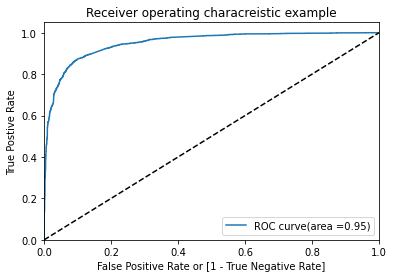

In [354]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### The ROC Curve value should close to 1, getting a value of 0.94 which is a good predictive model.

In [355]:
## Finding Optimal Cutoff point

## Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Pros_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.138027,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.273043,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.004745,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.967160,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.998719,7987,1,1,1,1,1,1,1,1,1,1,1


In [356]:
##Let's calculate accuracy, sensitivity and specificity

cutoff_df= pd.DataFrame (columns =['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


In [357]:
# let's take probability cutoff from 0 to 1
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi= cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.783814  0.970564  0.666837
0.2   0.2  0.829633  0.946034  0.756722
0.3   0.3  0.878129  0.894113  0.868118
0.4   0.4  0.891356  0.863451  0.908835
0.5   0.5  0.891041  0.834424  0.926504
0.6   0.6  0.884743  0.790679  0.943662
0.7   0.7  0.875295  0.739984  0.960051
0.8   0.8  0.846009  0.632870  0.979513
0.9   0.9  0.809951  0.521259  0.990781


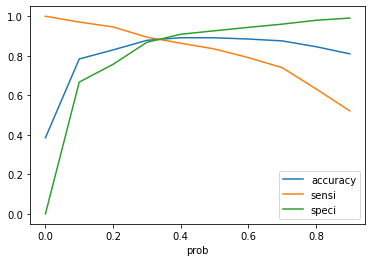

In [358]:
cutoff_df.plot.line(x='prob', y =['accuracy','sensi','speci'])
plt.show()

- from the above we can see that 0.3  to 0.4 is our cutoff so lets take it as 0.3

In [359]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.3 else 0)
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Pros_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.138027,3009,0,1,1,0,0,0,0,0,0,0,0,0,14
1,0,0.273043,1012,0,1,1,1,0,0,0,0,0,0,0,0,27
2,0,0.004745,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.967160,4750,1,1,1,1,1,1,1,1,1,1,1,1,97
4,1,0.998719,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


In [360]:
#sensitivity

TP/float(TP+FN)

0.8344235486508585

In [361]:
## Specificity

TN/float(TN+FP)

0.926504481434059

In [362]:
## Accuracy

TP/float(TP+FP)

0.8767182130584192

- Observation: The above model is performing well. The ROC Curve value is 0.94, which is very good and following are the values of train data:

__Accuracy = 86.8%
  Sensitivity = 82.3%
  Specificity = 92.1%__

In [363]:
## Predicting False positive rate, positive predictive value, Negative predictive value, precision , Recall.
## False positive rate - When customer didnot convert 

print(FP/float(TN+FP))

0.0734955185659411


In [364]:
# positive predictive value

print (TP/float(TP+FP))

0.8767182130584192


In [365]:
# Negative predictive value

print (TN/float(TN+FN))

0.8993288590604027


In [366]:
## Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion

array([[3390,  515],
       [ 259, 2187]], dtype=int64)

In [367]:
## Precision

# TP/TP + FP

confusion[1,1]/(confusion[0,1] + confusion[1,1])

0.8094004441154701

In [368]:
##Recall
# TP/TP+FN
confusion[1,1]/(confusion[1,0] + confusion[1,1])

0.8941128372853638

In [369]:
# Precision and recall tradeoff
# let's import library
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [370]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

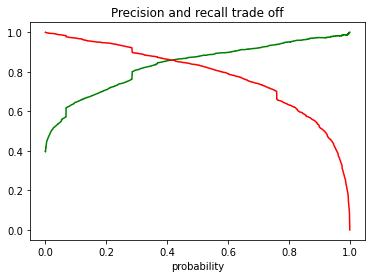

In [371]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.xlabel('probability')
plt.title('Precision and recall trade off')
plt.show()



- from the precision and Recall Trade-off we can say that If you increase the precision then recall will decrease and if you increase the recall then precision will decrease. We can not simultaneous increase both precision and recall,that mean our modal is good
- tradecutoff is arroun 0.4

# Making predictions on test Data

- from the above x_test contains all data but we use  columns of trained data

In [372]:
X_test.head()



,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other_notable_activity
3271,628652,0,0,4.0,157,4.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1490,644500,0,0,5.0,1513,5.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7936,588935,0,0,2.0,74,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4216,619437,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3830,623381,0,0,8.0,164,6.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [373]:

X_test[['Total Time Spent on Website','TotalVisits', 'Page Views Per Visit']]= scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']])

X_test.head()

ValueError: X has 3 features, but StandardScaler is expecting 18 features as input.

In [ ]:
X_test=X_test[col]
X_test.head()

In [ ]:
# make predictions on test da

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)



In [374]:

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.3 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()



,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.394878,1,39
1,1,1490,0.924922,1,92
2,0,7936,0.217705,0,22
3,1,4216,0.996541,1,100
4,0,3830,0.765752,1,77


In [375]:
## Confusion matrix
confusion= metrics.confusion_matrix(y_predicted_final.Converted,y_predicted_final.final_predicted)

print(confusion)


[[1410  324]
 [ 163  826]]


In [376]:
TP= confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP= confusion[0,1] # false positive
FN= confusion[1,0] # false negative

In [377]:
# accuracy of test data
print(metrics.accuracy_score(y_predicted_final.Converted,y_predicted_final.final_predicted))

0.8211531399192068


In [378]:
## Sensitivity

TP/float(TP+FN)

0.8351870576339737

In [379]:
## Specificity

TN/float(TN+FP)

0.8131487889273357

In [380]:
## Precision

TP/float(TP + FP)


0.7182608695652174

### For training data
__Accuracy = 86.8%
  Sensitivity = 82.3%
  Specificity = 92.1%__
for test data
__Accuracy = 81.4%
  Sensitivity = 83.4%
  Specificity = 80.2%__
### from above results we get accuracy has changed but difference is not huge so we can consider that our model is best fit 